# Income Classification using Logistic Regression


In this project, we will be using a dataset containing census information from the 1994 Census database to create a logistic regression model that predicts whether or not a person makes more than $50,000.

Let’s get started!

In [1]:
#import libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns

# columns creation, since data has no header
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.csv',header = None, names = col_names)

#### Datasets

The original data set is available at the UCI Machine Learning Repository.
The dataset saved as a DataFrame named df. Some of the input and output features of interest are:
* age: continuous
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
* sex: Female, Male
* capital-gain: continuous
* capital-loss: continuous
* hours-per-week: continuous
* native country: discrete
* income: discrete, >50K, <=50K

In [2]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### EDA and Logistic Regression Assumptions

 The outcome variable here is *income*. Let's check if the dataset is imbalanced. The outcome variable needs to be binary.

In [4]:
# Check Class Imbalance
print(df.income.value_counts())

<=50K    24720
>50K      7841
Name: income, dtype: int64


We will create predictor variables dataframe as well will take a look at categorical predictors correlations. 

In [5]:
# Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']
X = pd.get_dummies(df[feature_cols], drop_first=True)


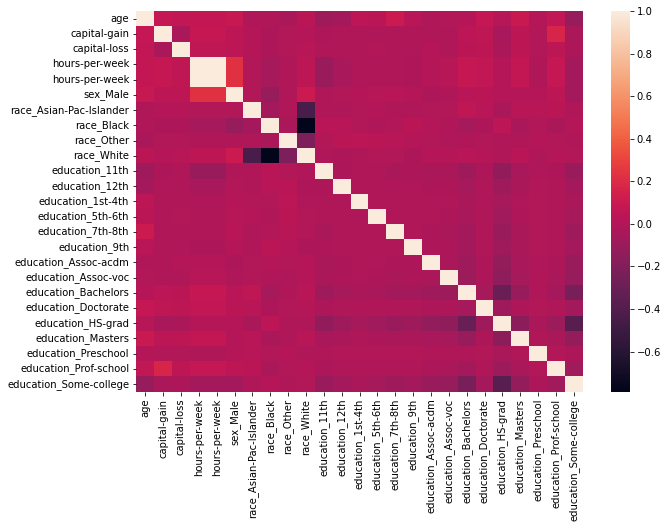

In [6]:
# Check logistic regression assumption: feature correlation
plt.figure(figsize = (10,7))
sns.heatmap(X.corr())
plt.show()
plt.close()

All the features are created from dummy variables, i.e. are 0 or 1, so scaling is not required for logistic regression.

Prior to modeling we need to create output variable which is binary.

In [7]:
# Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k
df['income'] = df['income'].replace({'>50K':1,'<=50K':0})
y = df['income']

#### Logistic Regression Models and Evaluation

Select and Split the Data into Test and Train. Find model parameters.

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=6)

# Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train.values.ravel())
y_pred = log_reg.predict(X_test)

# Print model parameters and coefficients
print('Model Parameters, Intercept:', log_reg.intercept_)

print('Model Parameters, Coeff:', log_reg.coef_)


Model Parameters, Intercept: [-5.55258926]
Model Parameters, Coeff: [[ 3.63907551e-02  3.17477537e-04  6.31482089e-04  1.87729692e-02
   1.18393274e-02  1.06025988e+00  0.00000000e+00 -2.84425558e-01
   0.00000000e+00  7.58243934e-02 -5.21154696e-01  0.00000000e+00
   0.00000000e+00 -2.57556339e-01 -8.99092213e-01 -4.69358961e-01
   5.35314235e-01  5.54658633e-01  1.22850303e+00  1.73999962e+00
   0.00000000e+00  1.59862370e+00  0.00000000e+00  1.84789611e+00
   3.69818538e-01]]


Let's bring up confusion matrix to see numers of True Positive, False Positive, True Negative and False Negative. As well accuracy score.

In [9]:
# Print out the confusion matrix
print("Confusion matrix: ")
print(confusion_matrix(y_test,y_pred))

# Print out accuracy
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Confusion matrix: 
[[7060  319]
 [1441  949]]
Accuracy score:  0.8198382638959976


Model coefficients for predictor variables in ascending order.

In [10]:
# Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
mod_coef = pd.DataFrame(zip(X_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
mod_coef = mod_coef[mod_coef.coef.abs()>0].sort_values('coef')
print(mod_coef)

                       var      coef
14       education_7th-8th -0.899092
10          education_11th -0.521155
15           education_9th -0.469359
7               race_Black -0.284426
13       education_5th-6th -0.257556
1             capital-gain  0.000317
2             capital-loss  0.000631
4           hours-per-week  0.011839
3           hours-per-week  0.018773
0                      age  0.036391
9               race_White  0.075824
24  education_Some-college  0.369819
16    education_Assoc-acdm  0.535314
17     education_Assoc-voc  0.554659
5                 sex_Male  1.060260
18     education_Bachelors  1.228503
21       education_Masters  1.598624
19     education_Doctorate  1.740000
23   education_Prof-school  1.847896


Visualization of the variable coefficients.

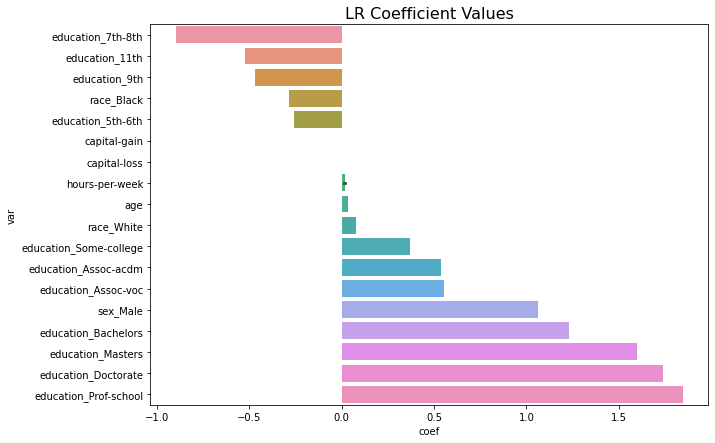

From the chart above we can conclude that graduate degree has highest impact on the income.


In [11]:
plt.figure(figsize = (10,7))
sns.barplot(data=mod_coef, x='coef', y='var')
plt.title('LR Coefficient Values',size=16)
plt.show()
plt.close()
print('From the chart above we can conclude that graduate degree has highest impact on the income.')

Receiver Operating Characteristics (ROC) curve and AUC value.

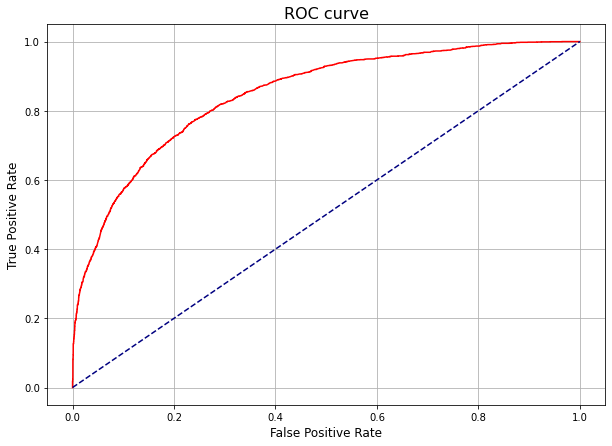

ROC AUC score: 0.8479504485475858


In [12]:
from sklearn.dummy import DummyClassifier
# Plot the ROC curve and print the AUC value.
# predicted probabilities
y_pred_prob = log_reg.predict_proba(X_test)
# Getting false positive and true positive values
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])
# Plot the ROC curve
plt.figure(figsize = (10,7))
plt.plot(fpr,tpr,color='red',label='ROC curve')
# DummyClassifier line
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(X_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1] )
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)

plt.xlabel('False Positive Rate', size=12)
plt.ylabel('True Positive Rate',size=12)
plt.grid()
plt.title('ROC curve',size=16)
plt.show()
plt.close()

# AUC scoce
roc_auc = roc_auc_score(y_test,y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

Let's take a look now at some examples and try out our model.

In [13]:
# Example number 1. White female age of 52, education HS graduate
white_female_52_hs = X[-1:]
y_pred_1 = log_reg.predict(white_female_52_hs)
y_pred_prob_1 = log_reg.predict_proba(white_female_52_hs)
print('Whether or not a person makes more than $50,000? 1 Stands for Yes, 0 stands for No:',y_pred_1)
print('Probability of a person make more than $50,000 is:', y_pred_prob_1[0][1])

# Example number 2. White male 22 years of age, education HS graduate 
white_male_22_hs = X[-2:-1]
y_pred_2 = log_reg.predict(white_male_22_hs)
y_pred_prob_2 = log_reg.predict_proba(white_male_22_hs)
print('Whether or not a person makes more than $50,000? 1 Stands for Yes, 0 stands for No:',y_pred_2)
print('Probability of a person make more than $50,000 is:', y_pred_prob_2[0][1])

Whether or not a person makes more than $50,000? 1 Stands for Yes, 0 stands for No: [1]
Probability of a person make more than $50,000 is: 0.9175737328264862
Whether or not a person makes more than $50,000? 1 Stands for Yes, 0 stands for No: [0]
Probability of a person make more than $50,000 is: 0.047260689906005286
